# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

TASK 1: HYPOTHESIS

H-0 (Null hypothesis): There is NO difference in the avr weigth loss between D1 and D2. 


H-1(Alternative Hypothesis): There is a difference in the avr weigth loss between D1 and D2. 


TASK 2: TEST OF HYPOTHESIS (Student's test)



In [30]:
import scipy.stats as stats


alpha = 0.05

#Declaration of Diet plan as lists
D1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
D2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

#Student's t-test
t_test_result = stats.ttest_ind(D1, D2)

#Extracting values
pvalue = t_test_result.statistic
tvalue = t_test_result.pvalue

print(F"The pvalue is: {pvalue}\n")
print(F"The tvalue is: {tvalue}")

The pvalue is: -3.5383407969933938

The tvalue is: 0.004083270191713912


TASK 3: CONCLUSION

In [5]:
#Conclusion
if pvalue < alpha:
    print("Conclusion: Reject the null hypothesis — significant difference between diets.")
else:
    print("Conclusion: Fail to reject the null hypothesis — no significant difference.")

Conclusion: Reject the null hypothesis — significant difference between diets.


## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

TASK 1: HYPOTHESIS

H-0 (Null Hypothesis): The mean corn yield is the same for all three types of fertilizer.

H-1 (Alternative Hypothesis): At least one fertilizer produces a different mean corn yield.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

TASK 2: ANOVA TEST

In [10]:
#Declaration of fert. as lists and alpha

alpha = 0.05

fertilizer_1 = [20, 21, 20, 19, 20]
fertilizer_2 = [22, 21, 23, 22, 21]
fertilizer_3 = [24, 23, 22, 23, 24]

#Performing ANOVA test
anova_result = stats.f_oneway(fertilizer_1, fertilizer_2, fertilizer_3)

#Extracting values 
pvalue = anova_result.pvalue
fvalue = anova_result.statistic

print(F"fvalue is: {fvalue}\n")
print(F"pvalue is: {pvalue}")



fvalue is: 20.315789473684188

pvalue is: 0.00014047824793190472


TASK 3: CONCLUSION AND ANALYSIS

In [36]:
if pvalue < alpha:
    print("Result: We reject the null hypothesis.")
    print("Conclusion: At least one fertilizer yields a significantly different average.")
else:
    print("Result: We fail to reject the null hypothesis.")
    print("Conclusion: No significant difference in average corn yield among the fertilizers.")

Result: We reject the null hypothesis.
Conclusion: At least one fertilizer yields a significantly different average.


CONCLUSION: There is a statistically significant difference in average corn yield between at least two of the fertilizer groups.

TASK 4: PROOF THAT ONE OF THE FERTILIZERS IS INDEED SIGNIFICANTLY DIFFERENT THAN THE AVERAGE


In [25]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Transforming the data into an array to easily work with it
data = np.array(fertilizer_1 + fertilizer_2 + fertilizer_3)

#Adding labels to each column for better readability 
labels = ['F1'] *len(fertilizer_1) + ['F2'] * len(fertilizer_2) + ['F3'] * len(fertilizer_3)
#print(labels)

#Use of TUKEY'S test (Pairwise comparisons and confidence intervals.)
tukey_result = pairwise_tukeyhsd(endog=data, groups=labels, alpha=alpha)

print(F"Tukey's test result:\n{tukey_result}")

Tukey's test result:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


TUKEY'S Test interpretation: 

Fertilizer 3 produces a significantly higher average yield than both Fertilizer 1 and Fertilizer 2. However, Fertilizer 1 and Fertilizer 2 are not significantly different from each other in terms of yield.

TASK 4.1: VISUALIZING DATA

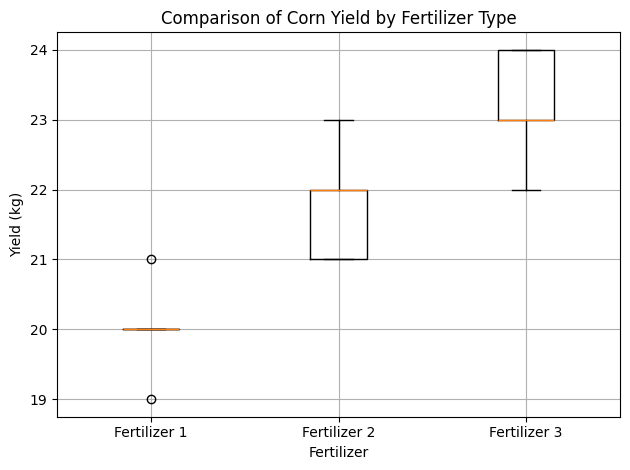

In [35]:
import matplotlib.pyplot as plt

# Data grouped by fertilizer
data = [fertilizer_1, fertilizer_2, fertilizer_3]
labels = ['Fertilizer 1', 'Fertilizer 2', 'Fertilizer 3']

#Boxplot to show the comparison between the corn yield by fert type
plt.boxplot(data, tick_labels=labels)
plt.title("Comparison of Corn Yield by Fertilizer Type")
plt.ylabel("Yield (kg)")
plt.xlabel("Fertilizer")
plt.grid(True)
plt.tight_layout()
plt.show()

Fertilizer 3 has a higher median and less overlap with the others. This turns out to be the visual support (proof) of the Tukey's result.

Fertilizer 1 and 2 havve more overlap in their ranges, which indeed matches the fact that the differences between them aren't significant.

